In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('//content/COVID-19_Vaccinations_in_the_United_States_County.csv')
df.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_5Plus',
       'Booster_Doses_5Plus_Vax

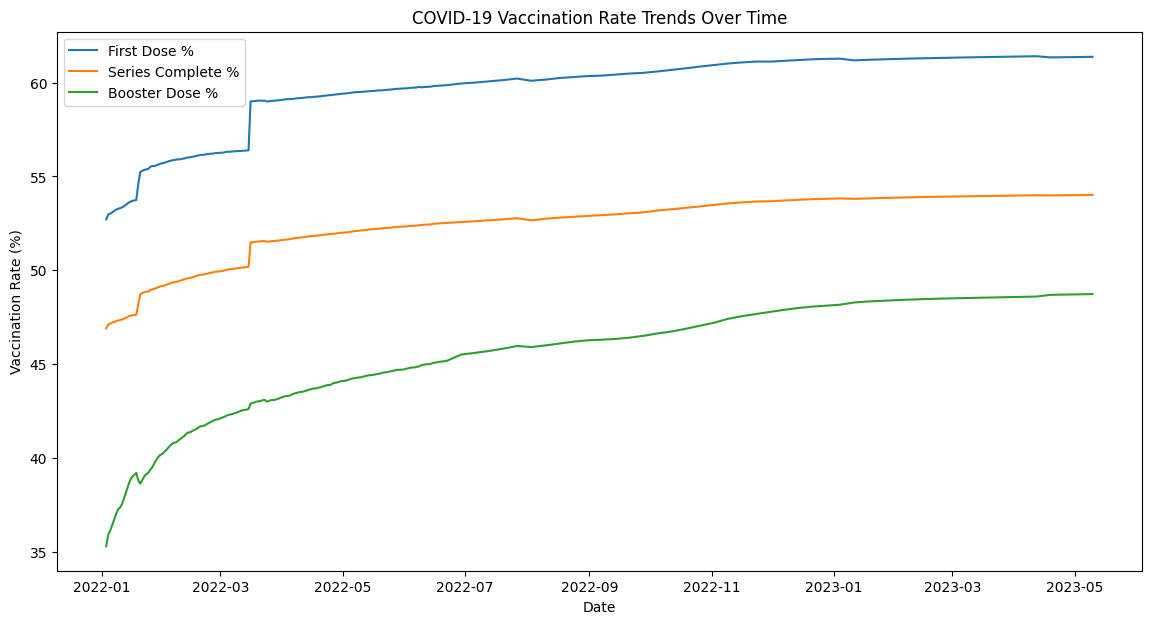

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Overall vaccination rate trend over time
plt.figure(figsize=(14, 7))
plt.plot(df.groupby('Date')['Administered_Dose1_Pop_Pct'].mean(), label='First Dose %')
plt.plot(df.groupby('Date')['Series_Complete_Pop_Pct'].mean(), label='Series Complete %')
plt.plot(df.groupby('Date')['Booster_Doses_Vax_Pct'].mean(), label='Booster Dose %')
plt.title('COVID-19 Vaccination Rate Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Vaccination Rate (%)')
plt.legend()
plt.show()

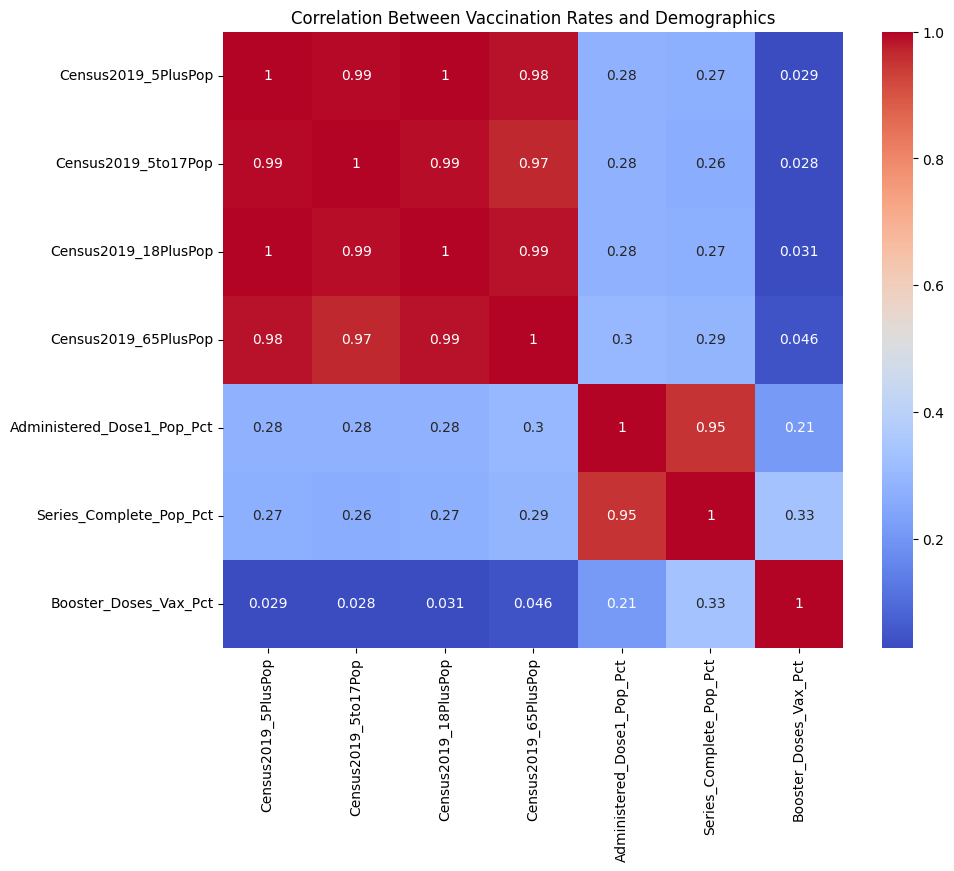

In [ ]:
# Selecting relevant columns for correlation analysis
demo_vax_cols = ['Census2019_5PlusPop', 'Census2019_5to17Pop', 'Census2019_18PlusPop', 'Census2019_65PlusPop', 'Administered_Dose1_Pop_Pct', 'Series_Complete_Pop_Pct', 'Booster_Doses_Vax_Pct']
correlation_matrix = df[demo_vax_cols].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Vaccination Rates and Demographics')
plt.show()

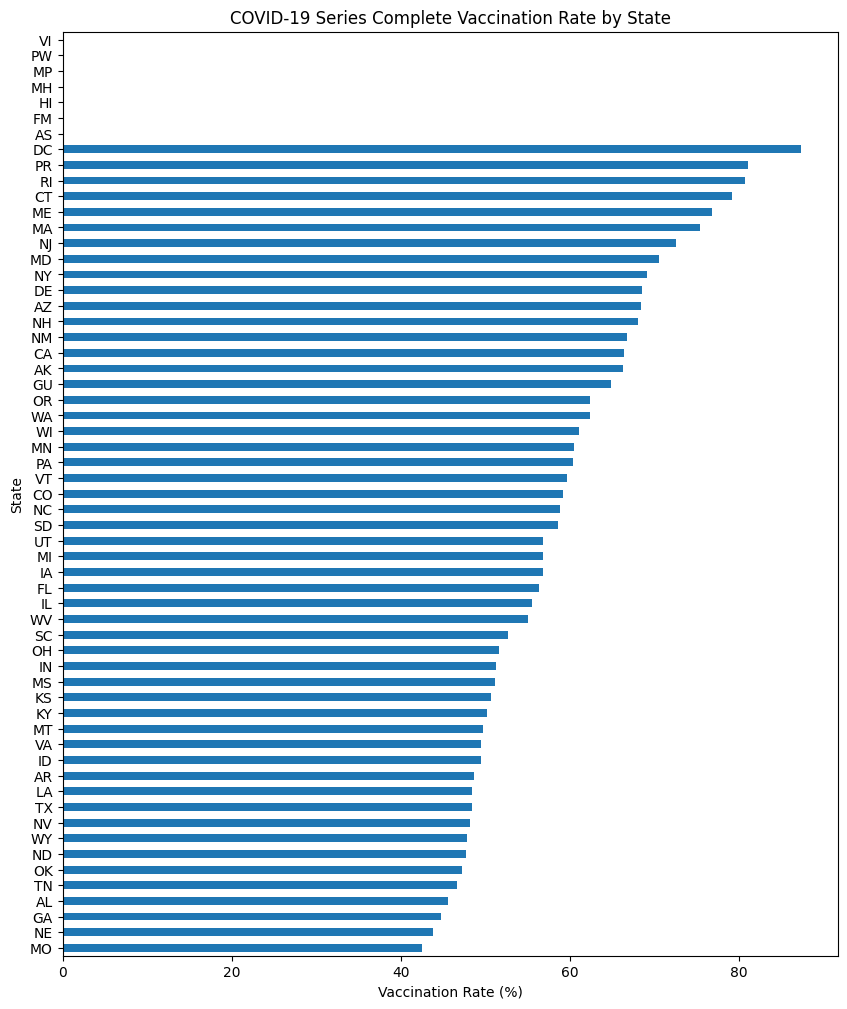

In [ ]:
# Aggregate vaccination rate by state for a specific point in time (e.g., latest date in the dataset)
latest_date = df['Date'].max()
state_vax_rate = df[df['Date'] == latest_date].groupby('Recip_State')['Series_Complete_Pop_Pct'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 12))
state_vax_rate.plot(kind='barh')
plt.title('COVID-19 Series Complete Vaccination Rate by State')
plt.xlabel('Vaccination Rate (%)')
plt.ylabel('State')
plt.show()

In [ ]:
# Descriptive statistics by SVI category
print("Vaccination rates by SVI category:")
print(df.groupby('SVI_CTGY')['Series_Complete_Pop_Pct'].describe())

# Descriptive statistics by Metro status
print("\nVaccination rates by Metro status:")
print(df.groupby('Metro_status')['Series_Complete_Pop_Pct'].describe())

Vaccination rates by SVI category:
             count       mean        std  min   25%   50%   75%   max
SVI_CTGY                                                             
A         169497.0  54.295271  13.998111  0.0  45.2  53.8  62.8  95.0
B         169006.0  52.501931  12.503859  0.0  43.8  51.9  59.6  95.0
C         169270.0  50.127557  12.418512  0.0  41.6  48.4  56.8  95.0
D         170022.0  49.647830  12.897617  0.0  41.1  47.8  55.8  95.0

Vaccination rates by Metro status:
                 count       mean        std  min   25%   50%   75%   max
Metro_status                                                             
Metro         260310.0  56.756089  13.367893  0.0  47.0  56.3  65.4  95.0
Non-metro     417464.0  48.459059  11.884405  0.0  40.9  47.4  54.7  95.0


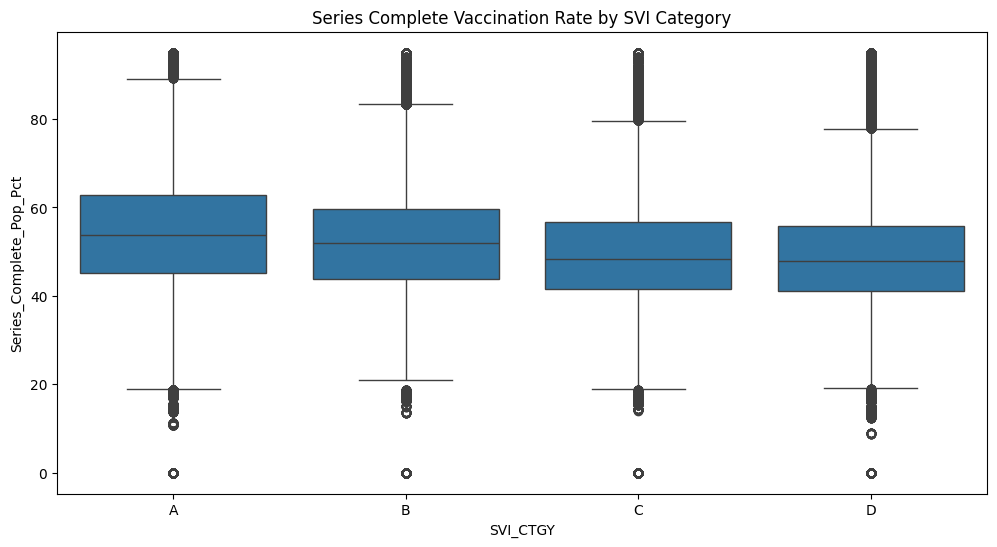

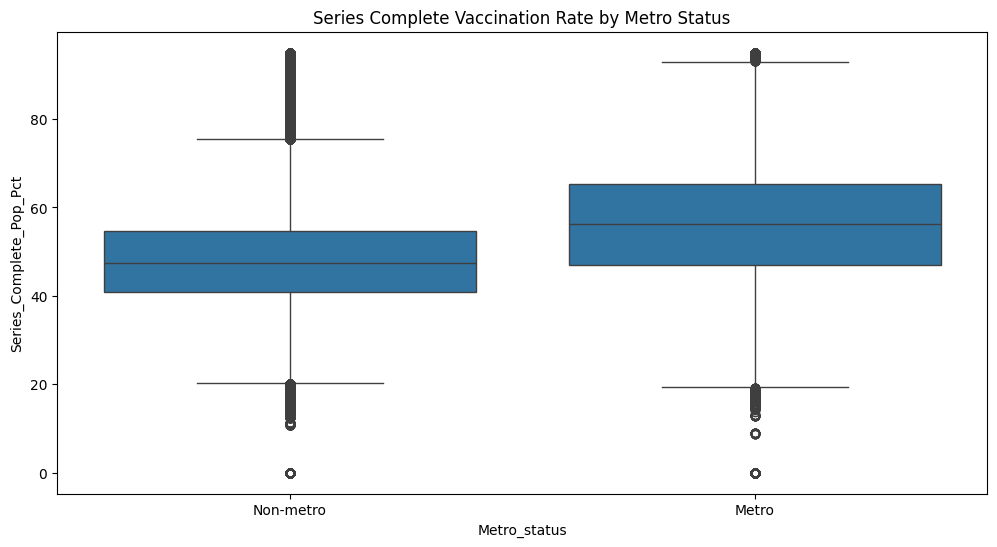

In [ ]:
# Boxplot for vaccination rates by SVI category
plt.figure(figsize=(12, 6))
sns.boxplot(x='SVI_CTGY', y='Series_Complete_Pop_Pct', data=df)
plt.title('Series Complete Vaccination Rate by SVI Category')
plt.show()

# Boxplot for vaccination rates by Metro status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metro_status', y='Series_Complete_Pop_Pct', data=df)
plt.title('Series Complete Vaccination Rate by Metro Status')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparing data with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['SVI_CTGY', 'Metro_status']),
], remainder='passthrough')

# Removing rows where the target variable is NaN
df_clean = df.dropna(subset=['Series_Complete_Pop_Pct'])

# Redefining X and y with the cleaned DataFrame
x = df_clean[['SVI_CTGY', 'Metro_status']]
y = df_clean['Series_Complete_Pop_Pct']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Linear Regression Model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(x_train, y_train)
predictions = model.predict(x_test)

# Evaluate the model
print(f"R-squared: {r2_score(y_test, predictions)}")

R-squared: 0.18456723445334056


In [ ]:
# Selecting independent variables (features) and dependent variable (target)
x = df[['Census2019', 'Census2019_5PlusPop', 'Census2019_18PlusPop', 'SVI_CTGY', 'Metro_status', 'Administered_Dose1_Pop_Pct', 'Series_Complete_Pop_Pct', 'Booster_Doses_Vax_Pct', 'Recip_State', 'Recip_County']]
y = df['Series_Complete_Pop_Pct']

In [ ]:
# Removing rows where the target variable 'Series_Complete_Pop_Pct' is missing
df_clean = df.dropna(subset=['Series_Complete_Pop_Pct'])

# Redefining X and y after removing rows with NaN in the target variable
x = df_clean[['Census2019', 'Census2019_5PlusPop', 'Census2019_18PlusPop', 'SVI_CTGY', 'Metro_status', 'Administered_Dose1_Pop_Pct', 'Booster_Doses_Vax_Pct', 'Recip_State', 'Recip_County']]
y = df_clean['Series_Complete_Pop_Pct']


# Identifying categorical and numerical columns
categorical_features = ['SVI_CTGY', 'Metro_status', 'Recip_State', 'Recip_County']
numerical_features = ['Census2019', 'Census2019_5PlusPop', 'Census2019_18PlusPop', 'Administered_Dose1_Pop_Pct', 'Booster_Doses_Vax_Pct']

# Creating transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining preprocessing for both types of data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Creating a preprocessing and modeling pipeline for both models

pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', DecisionTreeRegressor(max_depth=10, random_state=0))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=5, max_depth=10, random_state=0))])

pipeline_linear = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', LinearRegression())])

pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', KNeighborsRegressor(n_neighbors=5))])

In [ ]:
# Perform cross-validation for Mean Absolute Error

scores_mae_dt = cross_val_score(pipeline_dt, x, y, cv=2, scoring=make_scorer(mean_absolute_error))

scores_mae_rf = cross_val_score(pipeline_rf, x, y, cv=2, scoring=make_scorer(mean_absolute_error))

scores_mae_linear = cross_val_score(pipeline_linear, x, y, cv=2, scoring=make_scorer(mean_absolute_error))

scores_mae_knn = cross_val_score(pipeline_knn, x, y, cv=2, scoring=make_scorer(mean_absolute_error), n_jobs=-1)

In [ ]:
# Calculating average MAE across folds
avg_mae_dt = scores_mae_dt.mean()
avg_mae_rf = scores_mae_rf.mean()
avg_mae_linear = scores_mae_linear.mean()
avg_mae_knn = scores_mae_knn.mean()

print(f"Average MAE for Decision Tree: {avg_mae_dt}")
print(f"Average MAE for Random Forest: {avg_mae_rf}")
print(f"Average MAE for Linear Regression: {avg_mae_linear}")
print(f"Average MAE for KNN: {avg_mae_knn}")

Average MAE for Decision Tree: 1.7649232730128501
Average MAE for Random Forest: 1.7007642023235676
Average MAE for Linear Regression: 1.5689528073733987
Average MAE for KNN: 1.3508740092139515
